In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
df=pd.read_csv('breast.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [7]:
df["diagnosis"] = [1 if item == "M" else 0  for item in df["diagnosis"]]

In [8]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

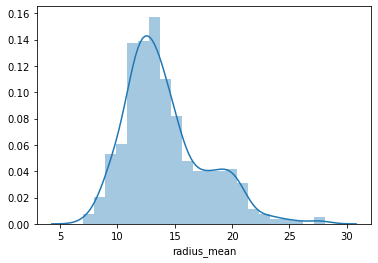

In [9]:
sns.distplot(df['radius_mean'])

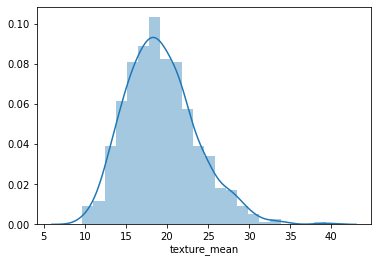

In [10]:
sns.distplot(df['texture_mean'])

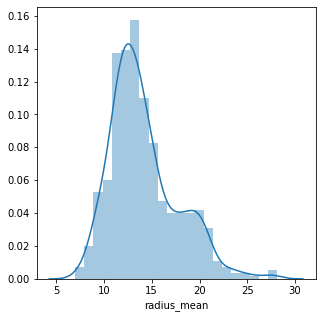

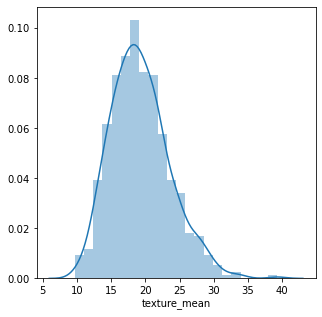

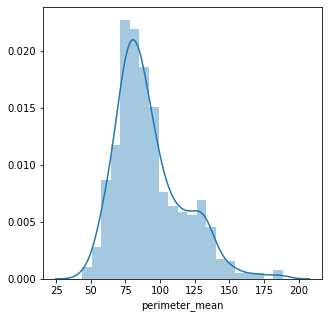

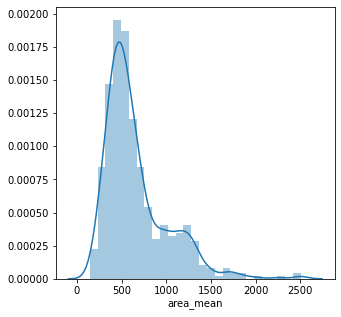

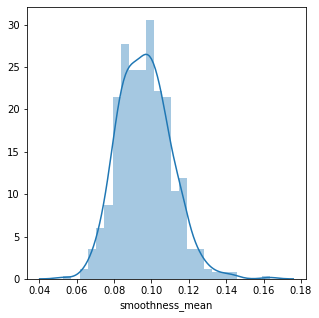

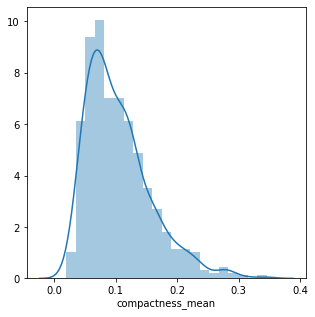

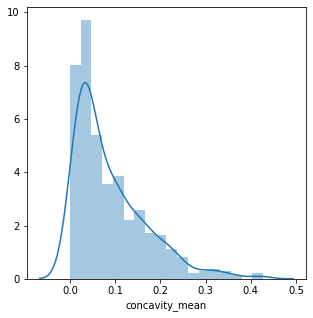

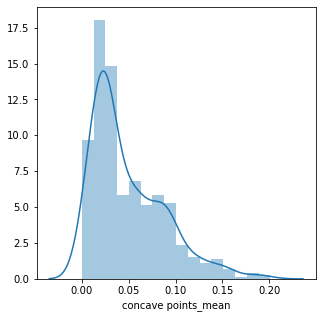

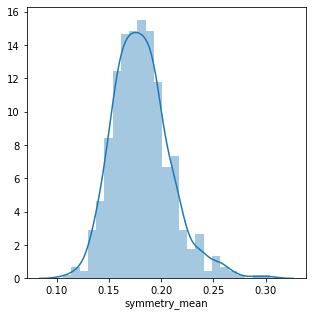

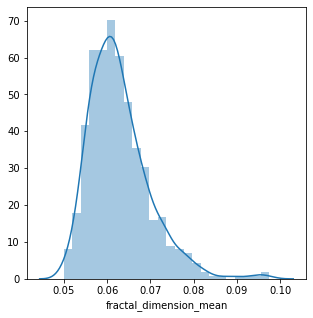

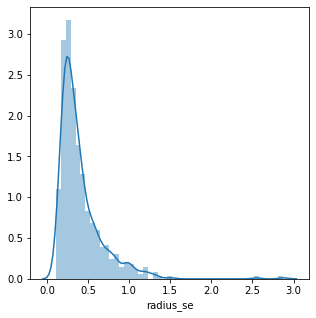

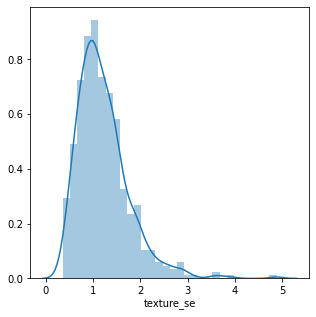

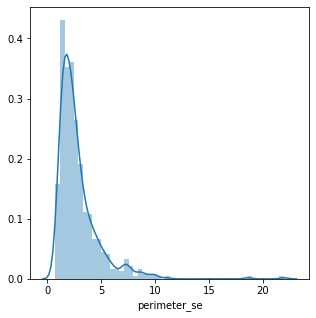

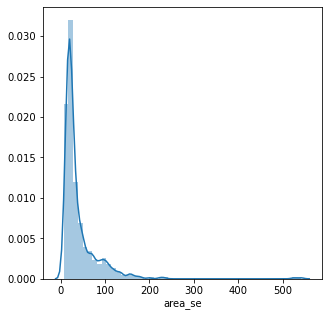

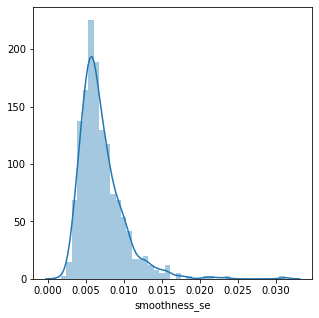

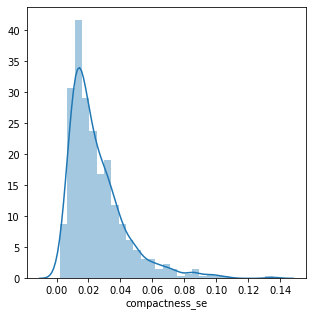

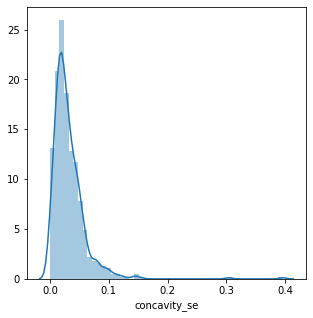

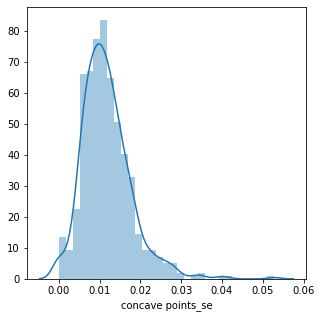

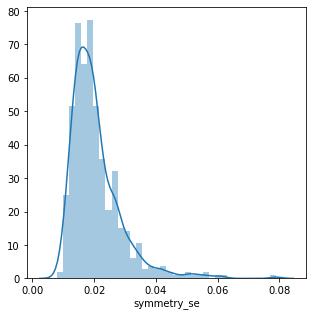

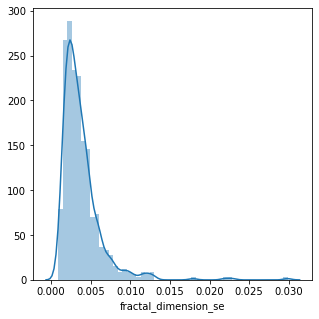

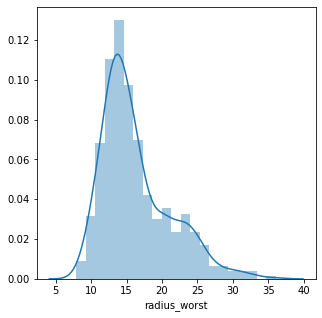

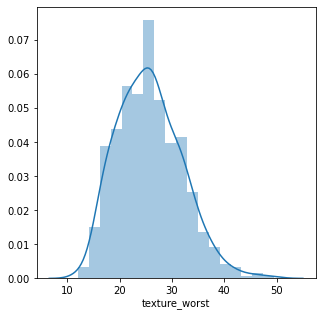

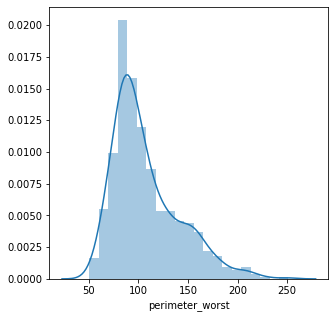

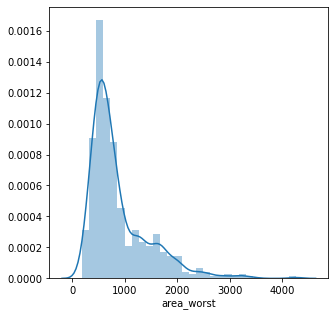

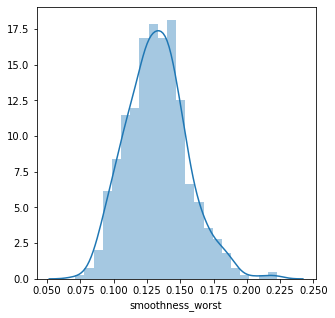

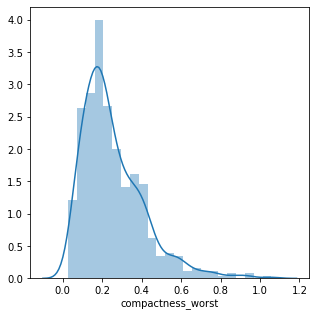

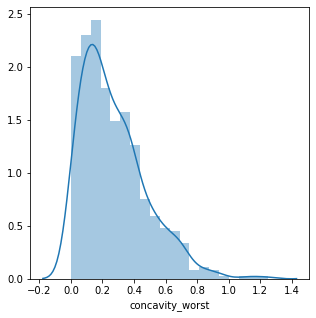

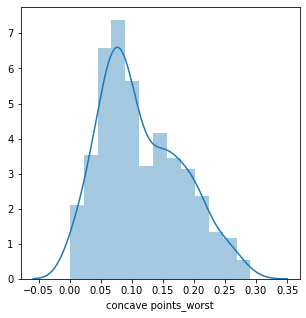

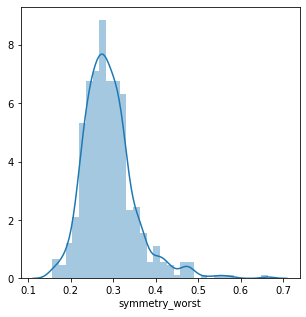

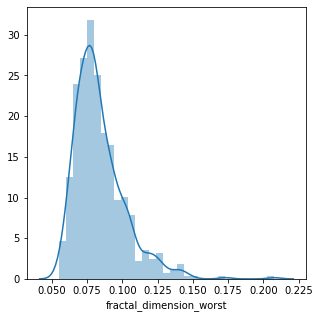

In [11]:
Y=df['diagnosis']
X=df.drop(['diagnosis'],axis=1)
for i in X.columns:
    plt.figure(figsize=(5,5))
    sns.distplot(df[i])
    plt.show()

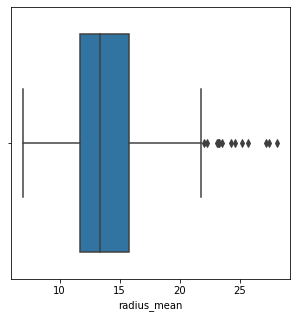

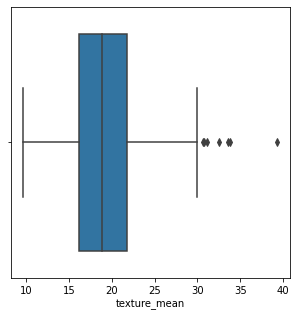

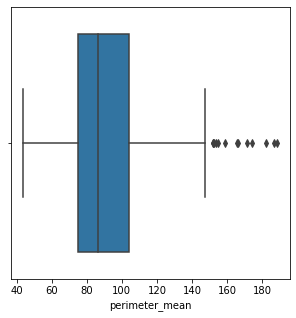

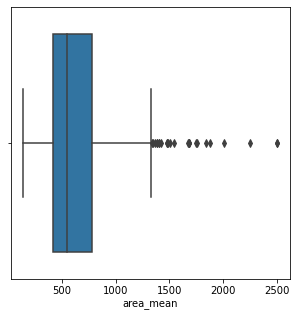

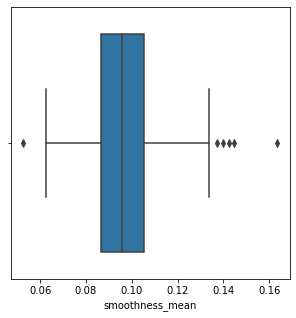

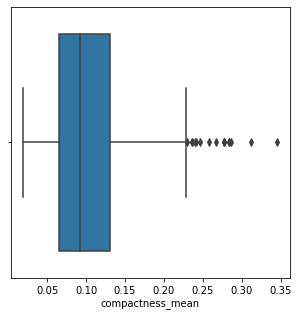

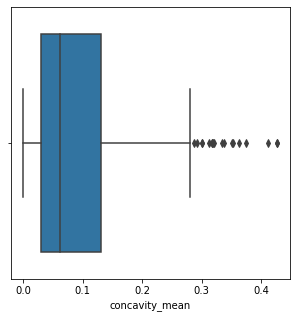

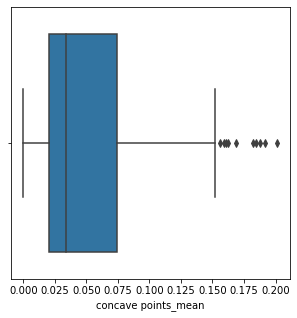

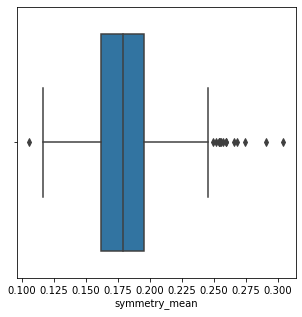

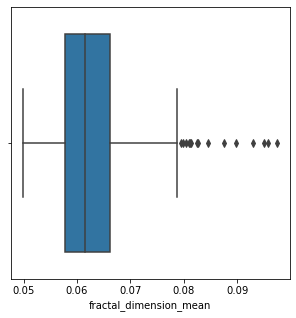

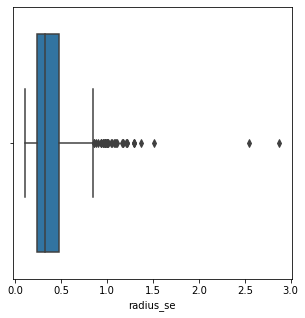

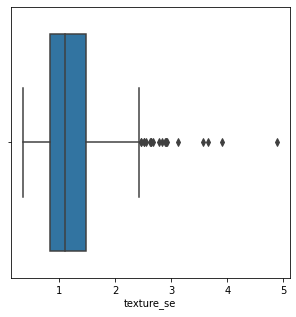

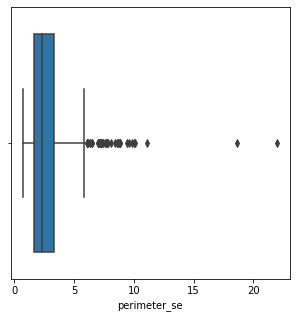

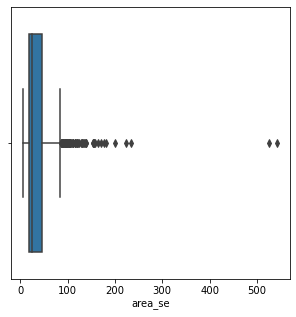

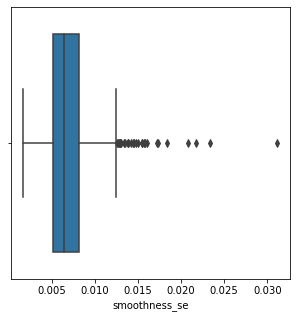

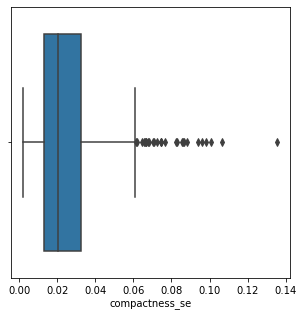

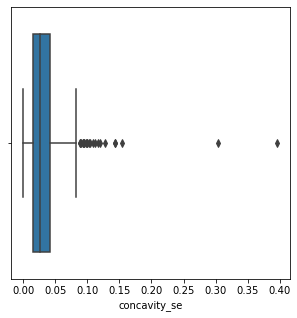

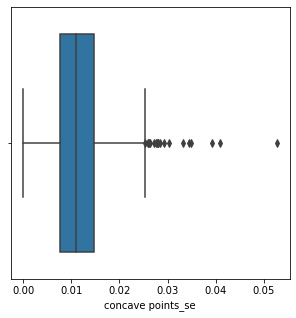

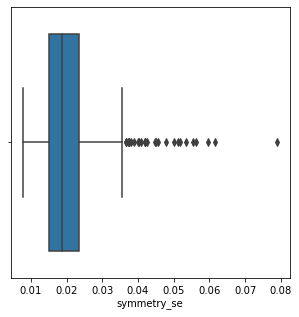

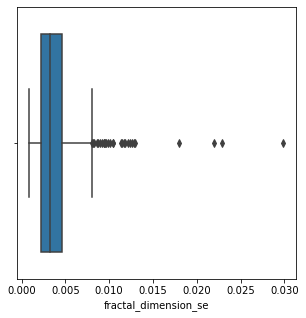

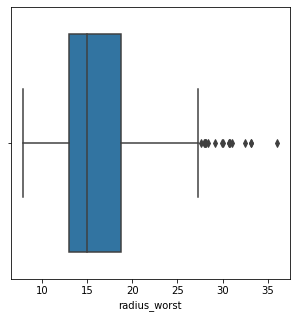

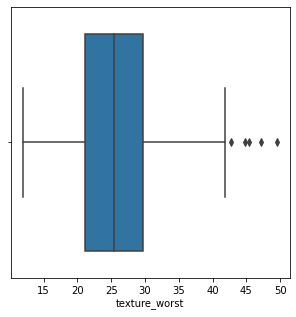

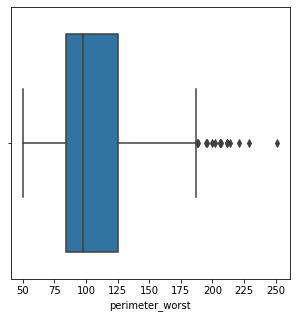

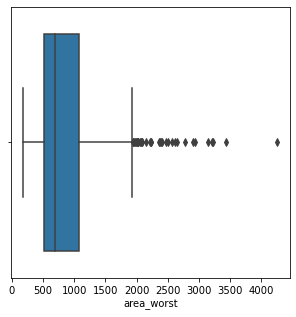

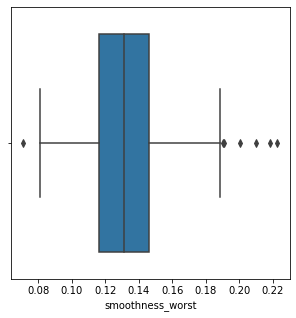

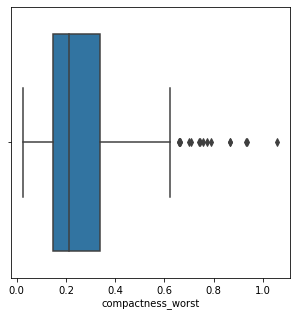

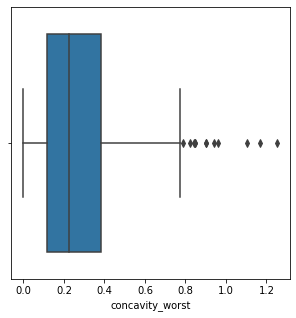

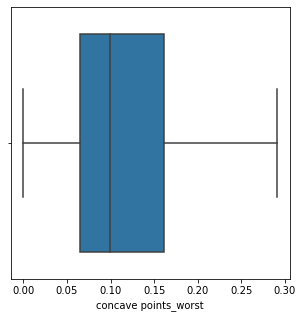

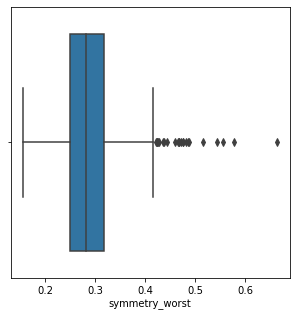

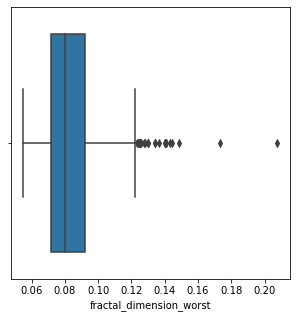

In [12]:
for i in X.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[i])
    plt.show()

In [13]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x = scaler.transform(X)

In [15]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
rf = RandomForestClassifier(max_depth=100, random_state=0)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(rf, X,Y, scoring='accuracy', cv=cv)
rf_score = np.mean(scores)

print('Accuracy : %.3f' % (rf_score))

Accuracy : 0.962


In [17]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
pca_ = pca.transform(x)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [19]:
neigh= KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train,y_train)
ypred=neigh.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)

0.9298245614035088


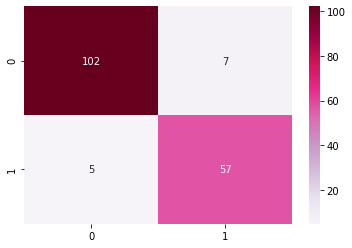

In [20]:

cf_matrix = confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="PuRd")
plt.show()

In [21]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       109
           1       0.89      0.92      0.90        62

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



In [22]:
import pickle

In [23]:
file=open('Breast_cancer.pkl','wb')
pickle.dump(neigh,file)

In [24]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [25]:
17.99	10.38	122.80	1001.0	0.11840	0.27760	0.3001	0.14710		17.33	184.60	2019.0	0.1622	0.6656	0.7119	0.2654	0.4601	0.11890

SyntaxError: invalid syntax (<ipython-input-25-6e4e909f1ecd>, line 1)

In [ ]:
17.99	10.38	122.8	1001	0.1184	0.2776	0.3001	0.1471	0.2419	0.07871	1.095	0.9053	8.589	153.4	0.006399	0.04904	0.05373	0.01587	0.03003	0.006193	25.38	17.33	184.6	2019	0.1622	0.6656	0.7119	0.2654	0.4601	0.1189
